# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
student_data=pd.DataFrame({'Age':[17,51,27,21,36,48,19,26,54,30],'Tardies':[10,1,5,9,4,2,9,6,0,3]})

In [3]:
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

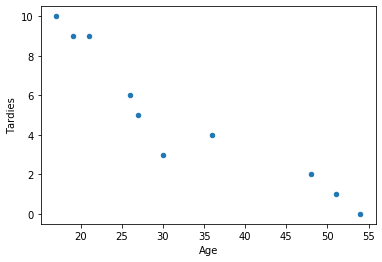

In [8]:
student_data.plot('Age','Tardies',kind='scatter')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

The younger the student the more often he is late to class

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [14]:
#Cov = -45.56666667
np.cov(student_data.T)

array([[187.65555556, -45.56666667],
       [-45.56666667,  12.54444444]])

In [10]:
#Corr = -0.939163
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [26]:
#Correlation = cov/(std1*std2)
-45.56666667/(np.std(student_data.Age,ddof=1)*np.std(student_data.Tardies,ddof=1))

-0.9391626887574145

Age and Tardies are highly correlated (as age increases tardies decreases)

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [27]:
from scipy.stats import linregress

In [28]:
slope, intercept, r_value, p_value, std_err = linregress(student_data.Age, student_data.Tardies)

In [32]:
print("Slope: {}, intercept: {}, r squared: {},\n p value: {}, std err: {}".format(slope, intercept, r_value**2, p_value, std_err))

Slope: -0.2428207709159808, intercept: 12.888803363135768, r squared: 0.8820265558250108,
 p value: 5.56665383455343e-05, std err: 0.03139728816158607


We used linregress because only one variable were used for x and y. Resultant equation was  Tardies = 12.89 - Age*0.243, our model captures 88% of variation in our data

Plot your regression model on your scatter plot.

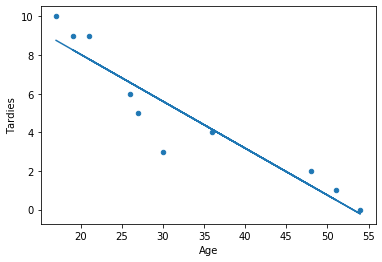

In [38]:
student_data.plot('Age','Tardies',kind='scatter')
plt.plot(student_data.Age,intercept+slope*student_data.Age)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

We can conclude age is good predictor of tardiness we predict 88% of variation.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [40]:
df=pd.read_csv('vehicles.csv')
df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [50]:
df[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year','CO2 Emission Grams/Mile']].corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


It would seem like Fuel Barrels/Year is the most important and Year provides the least amount of helpful information

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [51]:
import statsmodels.api as sm

In [52]:
X=sm.add_constant(df[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']])
Y=df['CO2 Emission Grams/Mile']

C:\Users\Usuario_Asignado\Anaconda3\envs\ironhack_conda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [56]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

We used ols from statsmodels because of the number of independent variables.

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [59]:
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Fri, 03 Jul 2020   Prob (F-statistic):               0.00
Time:                             04:01:59   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

We are really confident that our model does a good job predicting CO2 Emission Grams/Mile, 98% of variation is predicted.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [66]:
party=pd.DataFrame({'X':[1,3,4,6,8,9,11,14],'Y':[1,2,4,4,5,7,8,13]})
party

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [68]:
slope, intercept, r_value, p_value, std_err = linregress(party.X, party.Y)

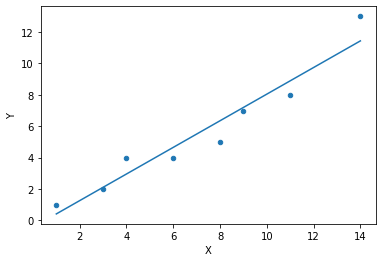

In [73]:
party.plot('X','Y',kind='scatter')
plt.plot(party.X,intercept+slope*party.X)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

There is a linear relationship between X and Y both go up together

In [83]:
print("Slope: {}, intercept: {}, r squared: {},\n p value: {}, std err: {}".format(slope, intercept, r_value**2, p_value, std_err))

Slope: 0.8484848484848485, intercept: -0.43939393939393945, r squared: 0.9316696375519905,
 p value: 0.00010236374464090686, std err: 0.09380896778286217


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

Maybe 14 could be considered problematic

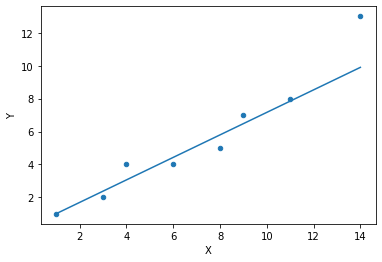

In [90]:
new_party=party[party.X!=14]
slope, intercept, r_value, p_value, std_err = linregress(new_party.X, new_party.Y)
party.plot('X','Y',kind='scatter')
plt.plot(party.X,intercept+slope*party.X)

In [91]:
print("Slope: {}, intercept: {}, r squared: {},\n p value: {}, std err: {}".format(slope, intercept, r_value**2, p_value, std_err))

Slope: 0.6842105263157895, intercept: 0.32330827067669166, r squared: 0.9433811802232854,
 p value: 0.0002644056885656864, std err: 0.07496206665031292


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

Slope and intercept went down because there was no necessity to reach for 14,13. Outliers can affect our model and must be treated somehow.